<a href="https://colab.research.google.com/github/harshitha24bad034-tech/harshitha24bad034_Exp3/blob/main/EX3_scenario2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Harshitha 24BAD034
from google.colab import files
uploaded = files.upload()

Saving auto-mpg.csv to auto-mpg.csv


In [2]:
import pandas as pd

df = pd.read_csv("auto-mpg.csv")

df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [3]:

import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer


from sklearn.linear_model import LinearRegression, Ridge


from sklearn.metrics import mean_squared_error, r2_score


In [4]:
df = pd.read_csv("auto-mpg.csv")

df.head()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [6]:
df['horsepower'] = df['horsepower'].replace('?', np.nan)
df['horsepower'] = df['horsepower'].astype(float)


In [7]:
X = df[['horsepower']]
y = df['mpg']


In [8]:
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)


In [9]:
poly2 = PolynomialFeatures(degree=2)
poly3 = PolynomialFeatures(degree=3)
poly4 = PolynomialFeatures(degree=4)

X_poly2 = poly2.fit_transform(X_imputed)
X_poly3 = poly3.fit_transform(X_imputed)
X_poly4 = poly4.fit_transform(X_imputed)


In [10]:
scaler2 = StandardScaler()
scaler3 = StandardScaler()
scaler4 = StandardScaler()

X_poly2_scaled = scaler2.fit_transform(X_poly2)
X_poly3_scaled = scaler3.fit_transform(X_poly3)
X_poly4_scaled = scaler4.fit_transform(X_poly4)


In [11]:
X_train2, X_test2, y_train, y_test = train_test_split(
    X_poly2_scaled, y, test_size=0.2, random_state=42)

X_train3, X_test3, _, _ = train_test_split(
    X_poly3_scaled, y, test_size=0.2, random_state=42)

X_train4, X_test4, _, _ = train_test_split(
    X_poly4_scaled, y, test_size=0.2, random_state=42)



In [12]:
model2 = LinearRegression()
model3 = LinearRegression()
model4 = LinearRegression()

model2.fit(X_train2, y_train)
model3.fit(X_train3, y_train)
model4.fit(X_train4, y_train)


LinearRegression()

In [13]:
y_pred2 = model2.predict(X_test2)
y_pred3 = model3.predict(X_test3)
y_pred4 = model4.predict(X_test4)


In [14]:
mse2 = mean_squared_error(y_test, y_pred2)
rmse2 = np.sqrt(mse2)
r2_2 = r2_score(y_test, y_pred2)

print("Degree 2")
print("MSE:", mse2)
print("RMSE:", rmse2)
print("R2:", r2_2)


Degree 2
MSE: 13.760855128148346
RMSE: 3.709562659957147
R2: 0.7440623896917425


In [15]:
mse3 = mean_squared_error(y_test, y_pred3)
rmse3 = np.sqrt(mse3)
r2_3 = r2_score(y_test, y_pred3)

print("\nDegree 3")
print("MSE:", mse3)
print("RMSE:", rmse3)
print("R2:", r2_3)



Degree 3
MSE: 13.813374257350006
RMSE: 3.7166348027954004
R2: 0.7430855884466042


In [16]:
mse4 = mean_squared_error(y_test, y_pred4)
rmse4 = np.sqrt(mse4)
r2_4 = r2_score(y_test, y_pred4)

print("\nDegree 4")
print("MSE:", mse4)
print("RMSE:", rmse4)
print("R2:", r2_4)



Degree 4
MSE: 14.118024022829625
RMSE: 3.757395909779754
R2: 0.737419419285479


In [17]:
comparison = pd.DataFrame({
    'Degree': [2, 3, 4],
    'MSE': [mse2, mse3, mse4],
    'RMSE': [rmse2, rmse3, rmse4],
    'R2 Score': [r2_2, r2_3, r2_4]
})

comparison


,Degree,MSE,RMSE,R2 Score
0,2,13.760855,3.709563,0.744062
1,3,13.813374,3.716635,0.743086
2,4,14.118024,3.757396,0.737419


In [18]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train4, y_train)

y_pred_ridge = ridge.predict(X_test4)

print("Ridge R2:", r2_score(y_test, y_pred_ridge))


Ridge R2: 0.7441024736636221


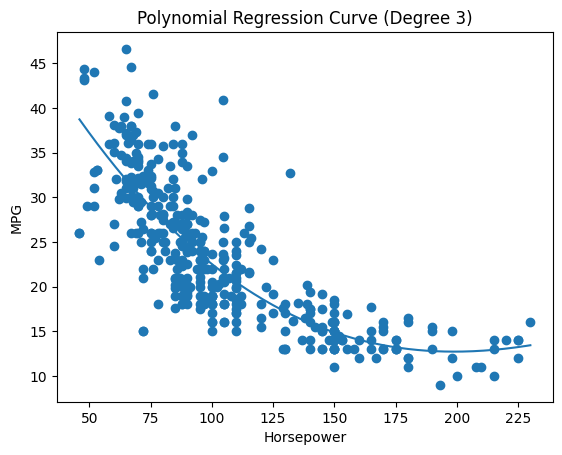

In [19]:
plt.figure()

sorted_zip = sorted(zip(X_imputed.flatten(), y))
X_sorted, y_sorted = zip(*sorted_zip)

plt.scatter(X_sorted, y_sorted)


X_range = np.linspace(min(X_imputed), max(X_imputed), 300).reshape(-1,1)

X_range_poly = poly3.transform(X_range)
X_range_scaled = scaler3.transform(X_range_poly)
y_range_pred = model3.predict(X_range_scaled)

plt.plot(X_range, y_range_pred)

plt.xlabel("Horsepower")
plt.ylabel("MPG")
plt.title("Polynomial Regression Curve (Degree 3)")
plt.show()


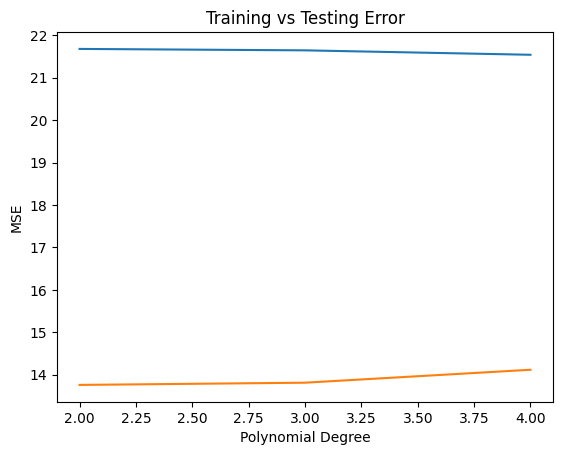

In [20]:
train_error = [
    mean_squared_error(y_train, model2.predict(X_train2)),
    mean_squared_error(y_train, model3.predict(X_train3)),
    mean_squared_error(y_train, model4.predict(X_train4))
]

test_error = [mse2, mse3, mse4]

plt.figure()
plt.plot([2,3,4], train_error)
plt.plot([2,3,4], test_error)

plt.xlabel("Polynomial Degree")
plt.ylabel("MSE")
plt.title("Training vs Testing Error")
plt.show()
